In [77]:
import moviepy.editor as mp
from PIL import Image, ImageDraw, ImageFilter
from skimage.filters import gaussian
import numpy as np

# Define the function to apply blur with a circle mask
def circle_obj_blur(im1):
    im1 = im1.resize((600, 600), Image.BICUBIC)
    im2 = Image.new("RGBA", im1.size, (0, 0, 0, 0))
    mask = Image.new("L", im1.size, 0)
    draw = ImageDraw.Draw(mask)
    
    #draw.ellipse((225, 255, 377, 377), fill=255)
    #draw.ellipse((225, 295, 377, 427), fill=255)
    #draw.ellipse((235, 305, 357, 407), fill=255)
    #draw.ellipse((245, 285, 357, 387), fill=255)
    draw.ellipse((275, 335, 357, 387), fill=255)
    im = Image.composite(im1, im2, mask)
    mask_blur = mask.filter(ImageFilter.GaussianBlur(10))
    im = Image.composite(im1, im2, mask_blur)
    return im

# Load the video clip
clip = mp.VideoFileClip("/home/jack/Desktop/YOUTUBE/resources/output.mkv")

# Initialize an empty list to store the new frames
new_frames = []

# Loop through each frame, apply the function and add the new frame to the list
for frame in clip.iter_frames():
    pil_frame = Image.fromarray(frame)
    processed_frame = circle_obj_blur(pil_frame)
    new_frames.append(np.asarray(processed_frame))  # Convert PIL image to numpy array


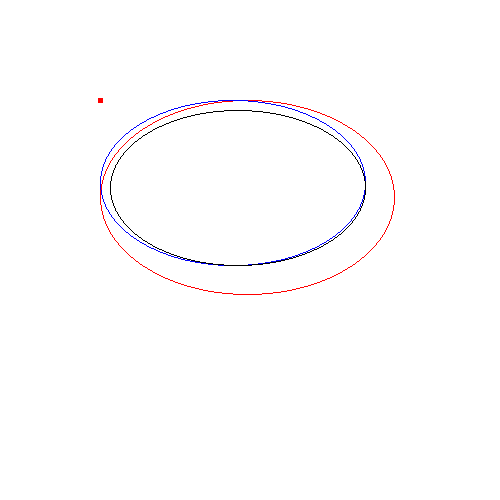

In [1]:
from PIL import Image, ImageDraw
# Create a new image with a white background
image = Image.new('RGB', (500, 500), color='white')
# Create a draw object
draw = ImageDraw.Draw(image)
# Draw a red dot at position (100, 100)
dot_size = 4
dot_pos = (100 - dot_size//2, 100 - dot_size//2, 100 + dot_size//2, 100 + dot_size//2)
draw.rectangle(dot_pos, fill='red')
i = 6
draw.ellipse((100, 100, 400-i, 300-i), outline="red")
i=35
draw.ellipse((100, 100, 400-i, 300-i), outline="blue")
h= 10
draw.ellipse((100+h, 100+h, 400-i, 300-i), outline="black")
image

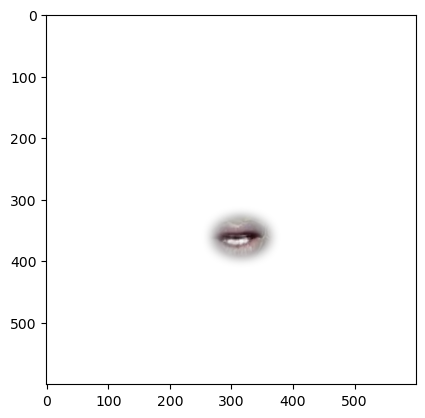

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Load the image as a numpy array
#img = plt.imread("path/to/image.jpg")

# Display the image
plt.imshow(new_frames[3])
plt.show()


In [80]:
import imageio

# Create the gif using the new_frames list
imageio.mimsave('resources/NEW-new_gif.gif', new_frames, fps=25)


In [15]:
!ffmpeg -i XXXnew_gif.gif XXXnew_gif.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [16]:
!ls XXXnew_gif.mp4

XXXnew_gif.mp4


In [4]:
import moviepy.editor as mp
from PIL import Image, ImageDraw, ImageFilter

def circle_obj_blur(im1):
    im1 = im1.resize((600,600), Image.BICUBIC)
    im2 = Image.new("RGBA",im1.size,(0,0,0,0))
    mask = Image.new("L", im1.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((25, 25, 575, 575), fill=255)
    #draw.ellipse((100, 100, 412, 412), fill=250)
    im = Image.composite(im1, im2, mask)
    mask_blur = mask.filter(ImageFilter.GaussianBlur(15))
    im = Image.composite(im1, im2, mask_blur)
    return im

clip = mp.VideoFileClip("/home/jack/Desktop/YOUTUBE/resources/output.mkv")
print(clip.fps)
new_frames = []
cnt = 0
for frame in clip.iter_frames():
    cnt = cnt +1
    pil_frame = Image.fromarray(frame)
    processed_frame = circle_obj_blur(pil_frame)
    new_frames.append(processed_frame)
print(cnt)
print(len(new_frames))
#new_clip = mp.ImageSequenceClip(new_frames, fps=clip.fps)
#new_clip.write_videofile("/home/jack/Desktop/YOUTUBE/resources/Newblur.mp4")


25.0
511
511


In [5]:
new_clip = mp.ImageSequenceClip(new_frames, fps=clip.fps)
new_clip.write_videofile("/home/jack/Desktop/YOUTUBE/resources/Newblur.mp4")


AttributeError: shape

In [14]:
import moviepy.editor as mp
from PIL import Image, ImageDraw, ImageFilter
from skimage.filters import gaussian

# Define the function to apply blur with a circle mask
def circle_obj_blur(im1):
    im1 = im1.resize((600, 600), Image.BICUBIC)
    im2 = Image.new("RGBA", im1.size, (0, 0, 0, 0))
    mask = Image.new("L", im1.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((25, 25, 575, 575), fill=255)
    im = Image.composite(im1, im2, mask)
    mask_blur = mask.filter(ImageFilter.GaussianBlur(15))
    im = Image.composite(im1, im2, mask_blur)
    return im

# Load the video clip
#clip = mp.VideoFileClip("/home/jack/Desktop/YOUTUBE/resources/sample.mp4")
clip = mp.VideoFileClip("/home/jack/Desktop/YOUTUBE/resources/output.mkv")
# Initialize an empty list to store the new frames
new_frames = []

# Loop through each frame, apply the function and add the new frame to the list
for frame in clip.iter_frames():
    pil_frame = Image.fromarray(frame)
    processed_frame = circle_obj_blur(pil_frame)
    new_frames.append(processed_frame)

# Create a new video clip with the processed frames
new_clip = mp.ImageSequenceClip(new_frames, fps=clip.fps)

# Write the new video clip to a file
new_clip.write_videofile("/home/jack/Desktop/YOUTUBE/resources/Newblur.mp4")
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[14], line 30
     27     new_frames.append(processed_frame)
     29 # Create a new video clip with the processed frames
---> 30 new_clip = mp.ImageSequenceClip(new_frames, fps=clip.fps)
     32 # Write the new video clip to a file
     33 new_clip.write_videofile("/home/jack/Desktop/YOUTUBE/resources/Newblur.mp4")

File ~/miniconda3/envs/cloned_base/lib/python3.9/site-packages/moviepy/video/io/ImageSequenceClip.py:84, in ImageSequenceClip.__init__(self, sequence, fps, durations, with_mask, ismask, load_images)
     82    size = imread(sequence[0]).shape
     83 else:
---> 84    size = sequence[0].shape
     86 for image in sequence:
     87     image1=image

File ~/miniconda3/envs/cloned_base/lib/python3.9/site-packages/PIL/Image.py:519, in Image.__getattr__(self, name)
    512     warnings.warn(
    513         "Image categories are deprecated and will be removed in Pillow 10 "
    514         "(2023-07-01). Use is_animated instead.",
    515         DeprecationWarning,
    516         stacklevel=2,
    517     )
    518     return self._category
--> 519 raise AttributeError(name)

AttributeError: shape

AttributeError: shape

In [25]:
import moviepy.editor as mp
from PIL import Image, ImageDraw, ImageFilter

def circle_obj_blur(im1):
    im1 = im1.resize((600,600), Image.BICUBIC)
    im2 = Image.new("RGBA",im1.size,(0,0,0,0))
    mask = Image.new("L", im1.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((25, 25, 575, 575), fill=255)
    #draw.ellipse((100, 100, 412, 412), fill=250)
    im = Image.composite(im1, im2, mask)
    mask_blur = mask.filter(ImageFilter.GaussianBlur(15))
    im = Image.composite(im1, im2, mask_blur)
    return im

clip = mp.VideoFileClip("/home/jack/Desktop/YOUTUBE/resources/output.mkv")

new_frames = []
for frame in clip.iter_frames():
    pil_frame = Image.fromarray(frame)
    processed_frame = circle_obj_blur(pil_frame)
    new_frames.append(processed_frame)

new_clip = mp.ImageSequenceClip(new_frames, fps=clip.fps)
new_clip.write_videofile("/home/jack/Desktop/YOUTUBE/resources/Newblur.mp4")


OSError: MoviePy error: the file /home/jack/Desktop/YOUTUBE/resources/output.mkv could not be found!
Please check that you entered the correct path.

In [24]:
from skimage.filters import gaussian
from moviepy.editor import VideoFileClip, clips_array, concatenate_videoclips
import matplotlib.pyplot as plt
import numpy as np
import PIL

def blur(image):
    image = image.convert("RGBA")
    """ Returns a blurred (radius=4 pixels) version of the image """    
    return gaussian(np.array(image).astype(float), sigma=4)

image = PIL.Image.open("/home/jack/Desktop/StoryMaker/static/images/eyes/00009.jpg")
im = blur(image)
im

array([[[174.86158355, 183.28898344, 192.98462165, 203.39163722],
        [174.72509881, 183.16630502, 192.87805619, 203.30256925],
        [174.59440746, 183.04744828, 192.77362286, 203.21432791],
        ...,
        [ 88.01329557, 107.75594108, 129.54039028, 152.10868609],
        [ 88.15075699, 107.87430616, 129.63884954, 152.18754936],
        [ 88.25140035, 107.96114493, 129.71123674, 152.24565235]],

       [[174.66685773, 183.11570622, 192.83562796, 203.26835526],
        [174.53389859, 182.9961729 , 192.73177352, 203.18153582],
        [174.40365862, 182.87777637, 192.62778585, 203.09370317],
        ...,
        [ 87.56856642, 107.38660394, 129.24571933, 151.88352691],
        [ 87.69531864, 107.49574724, 129.33650791, 151.95624683],
        [ 87.78805116, 107.57575867, 129.40320294, 152.00978037]],

       [[174.43243007, 182.90649154, 192.65521128, 203.11865307],
        [174.30442025, 182.79137861, 192.55517163, 203.03500127],
        [174.17570349, 182.67441893, 192.45248

640.0 960.0


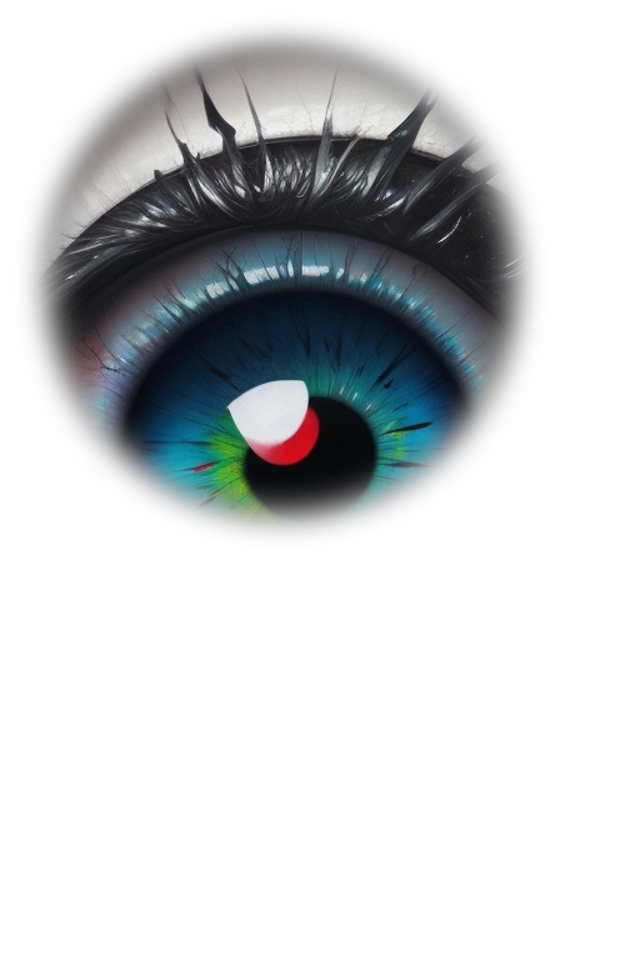

In [20]:
from PIL import Image,ImageFilter,ImageDraw
def circle_obj_blur(im1):
    w,h =im1.size
    ww,hh =w*1.25,h*1.25
    print(ww,hh)
    im1 = im1.resize((int(ww),int(hh)), Image.BICUBIC)
    im2 = Image.new("RGBA",im1.size,(0,0,0,0))
    mask = Image.new("L", im1.size, 0)
    draw = ImageDraw.Draw(mask)
    #draw.ellipse((75, 75, 875, 875), fill=255)
    draw.ellipse((50, 50, 512, 512), fill=250)
    im = Image.composite(im1, im2, mask)
    mask_blur = mask.filter(ImageFilter.GaussianBlur(15))
    im = Image.composite(im1, im2, mask_blur)
    return im
im1 = Image.open("/home/jack/Desktop/StoryMaker/static/images/eyes/00009.jpg")
circle_obj_blur(im1)

In [8]:
from skimage.filters import gaussian
from moviepy.editor import VideoFileClip, clips_array, concatenate_videoclips
import matplotlib.pyplot as plt

import PIL
def blur(image):
    image = image.convert("RGBA")
    """ Returns a blurred (radius=4 pixels) version of the image """    
    return gaussian(image.astype(float), sigma=4)

image = PIL.Image.open("/home/jack/Desktop/YOUTUBE/resources/Ai_Generated_Image.jpg")
im = blur(image)
im = im.resize((400,400),PIL.Image.BICUBIC)
plt.imshow(im)
plt.show()

AttributeError  
---> 12 im = blur(image)
return gaussian(image.astype(float), sigma=4)
AttributeError: astype

AttributeError: astype

In [ ]:
from moviepy.video.compositing.concatenate import concatenate_videoclips
from skimage.filters import gaussian
from moviepy.editor import VideoFileClip, clips_array, concatenate_videoclips

def blur(image):
    """ Returns a blurred (radius=4 pixels) version of the image """    
    return gaussian(image.astype(float), sigma=4)

# open video and resize to 460
clip1 = VideoFileClip("cat1.mp4").subclip(1,2).resize(width=200)
clip2 = VideoFileClip("cat1.mp4").subclip(2,4).resize(width=200)
clip3 = VideoFileClip("cat1.mp4").subclip(4,6).resize(width=200)

# blur clip 2
clip2_blurred = clip2.fl_image( blur )

# final 
final_clip = concatenate_videoclips([clip1, clip2_blurred, clip3])
final_clip.write_gif("blurdemo.gif")

In [ ]:
An ellipse is a closed curve that looks like a stretched circle. To draw an ellipse, you need to specify the position and dimensions of its bounding box. The bounding box is a rectangle that surrounds the ellipse, and its width and height determine the size of the ellipse. The top-left corner of the bounding box specifies the position of the ellipse.

To draw an ellipse using the Python pillow library, you first need to create a Draw object from an image. Here's an example:

python
Copy code
from PIL import Image, ImageDraw

# Create a new image with a white background
image = Image.new('RGB', (500, 500), color='white')

# Create a draw object
draw = ImageDraw.Draw(image)
In this example, we create a new image with a white background and a size of 500x500 pixels. Then, we create a Draw object from the image using ImageDraw.Draw().

To draw an ellipse, you can use the ellipse() method of the Draw object. The ellipse() method takes a tuple of four values representing the bounding box of the ellipse, and an optional fill parameter that specifies the color to fill the ellipse with. Here's an example:

css
Copy code
# Draw a white ellipse with a black outline
draw.ellipse((100, 100, 400, 300), outline=0)
In this example, we draw a white ellipse with a black outline. The bounding box of the ellipse is specified as (100, 100, 400, 300), which means that the top-left corner of the bounding box is at position (100, 100), and the width and height of the bounding box are 300 pixels and 200 pixels, respectively.

To locate an ellipse, you can adjust the position of its bounding box. For example, to move an ellipse 20 pixels down, you can add 20 to the y-coordinate of the top-left corner of the bounding box. Here's an example:

python
Copy code
# Draw a white ellipse 20 pixels down from the previous one
draw.ellipse((100, 120, 400, 320), outline=0)
In this example, we moved the ellipse 20 pixels down by adding 20 to the y-coordinate of the top-left corner of the bounding box.

I hope this helps! Let me know if you have any more questions.




Regenerate response

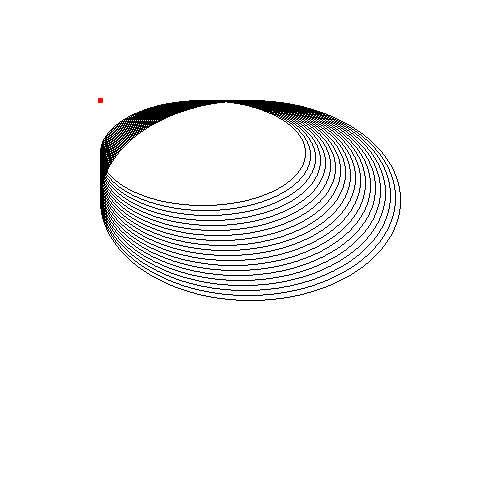

In [47]:
from PIL import Image, ImageDraw

# Create a new image with a white background
image = Image.new('RGB', (500, 500), color='white')

# Create a draw object
draw = ImageDraw.Draw(image)

# Draw a red dot at position (100, 100)
dot_size = 4
dot_pos = (100 - dot_size//2, 100 - dot_size//2, 100 + dot_size//2, 100 + dot_size//2)
draw.rectangle(dot_pos, fill='red')

for i in range(0,100,5):
    draw.ellipse((100, 100, 400-i, 300-i), outline=0)
image

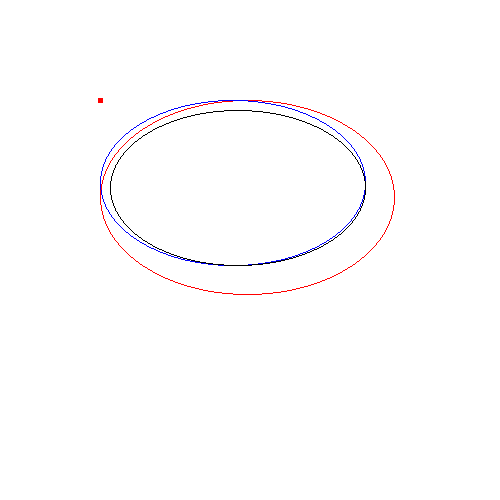

In [67]:
from PIL import Image, ImageDraw
# Create a new image with a white background
image = Image.new('RGB', (500, 500), color='white')
# Create a draw object
draw = ImageDraw.Draw(image)
# Draw a red dot at position (100, 100)
dot_size = 4
dot_pos = (100 - dot_size//2, 100 - dot_size//2, 100 + dot_size//2, 100 + dot_size//2)
draw.rectangle(dot_pos, fill='red')
i = 6
draw.ellipse((100, 100, 400-i, 300-i), outline="red")
i=35
draw.ellipse((100, 100, 400-i, 300-i), outline="blue")
h= 10
draw.ellipse((100+h, 100+h, 400-i, 300-i), outline="black")
image

In [ ]:
    #draw.ellipse((225, 255, 377, 377), fill=255)
    #draw.ellipse((225, 295, 377, 427), fill=255)
    #draw.ellipse((235, 305, 357, 407), fill=255)
    #draw.ellipse((245, 285, 357, 387), fill=255)
    draw.ellipse((265, 305, 357, 400), fill=255)

In [ ]:
import cv2
import numpy as np

# Load images
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')

# Define corresponding points (can use STASM or manual markings)
points1 = np.array([[x1, y1], [x2, y2], ...])
points2 = np.array([[x1, y1], [x2, y2], ...])

# Create morphing function
morph_func = cv2.createThinPlateSplineShapeTransformer()

# Set corresponding points for the morphing function
src_pts = np.expand_dims(points1, axis=0)
dst_pts = np.expand_dims(points2, axis=0)
morph_func.estimateTransformation(dst_pts, src_pts)

# Generate intermediate frames
num_frames = 10
for i in range(num_frames):
    t = (i + 1) / (num_frames + 1)
    inter_points = (1 - t) * points1 + t * points2
    inter_pts = np.expand_dims(inter_points, axis=0)
    inter_frame = morph_func.warpImage(img1, inter_pts)

    # Save intermediate frame as image or add to video
    cv2.imwrite('inter_frame{}.jpg'.format(i), inter_frame)


In [ ]:
import cv2
import stasm

# Load image
img = cv2.imread('image.jpg')

# Initialize STASM
stasm.init()

# Detect facial landmarks
landmarks = stasm.search_single(img)

# Display landmarks on the image
for landmark in landmarks:
    cv2.circle(img, (int(landmark[0]), int(landmark[1])), 2, (0, 255, 0), -1)

# Display the image with landmarks
cv2.imshow('Facial Landmarks', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import stasm
from matplotlib import pyplot as plt

# Load image
img = cv2.imread('image.jpg')

# Initialize STASM
stasm.init()

# Detect facial landmarks
landmarks = stasm.search_single(img)

# Display landmarks on the image
for landmark in landmarks:
    cv2.circle(img, (int(landmark[0]), int(landmark[1])), 2, (0, 255, 0), -1)

# Display the image with landmarks using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


DarkStorm/00000.jpg
DarkStorm/00001.jpg


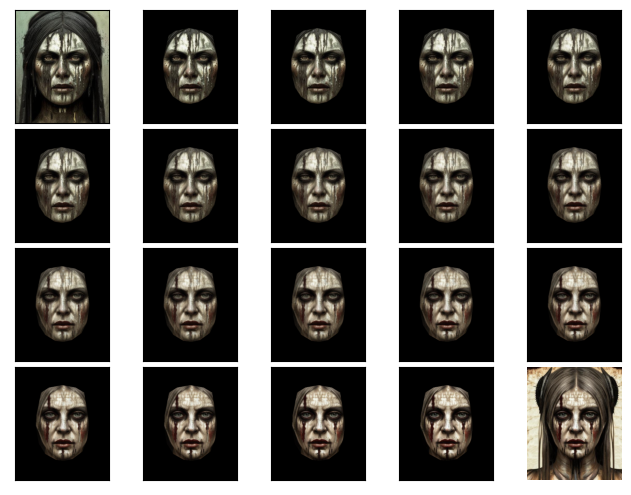

DarkStorm/00002.jpg


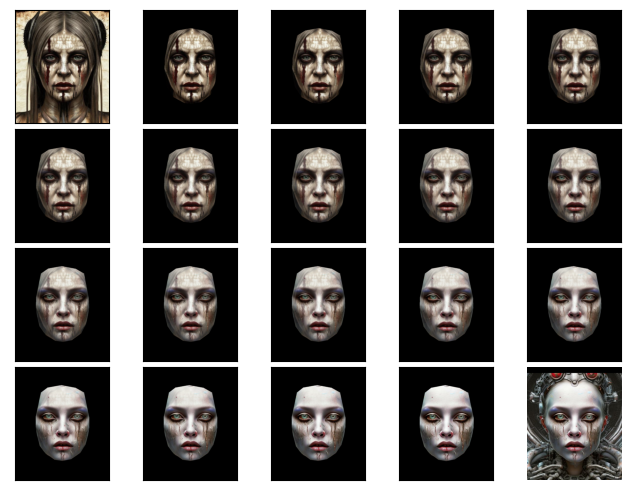

DarkStorm/00003.jpg


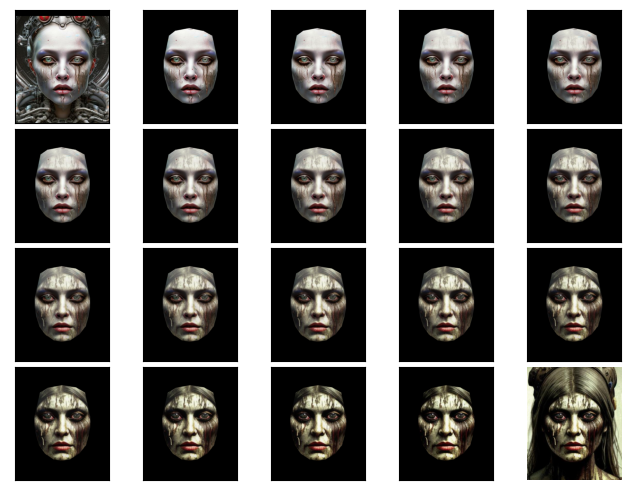

DarkStorm/00004.jpg


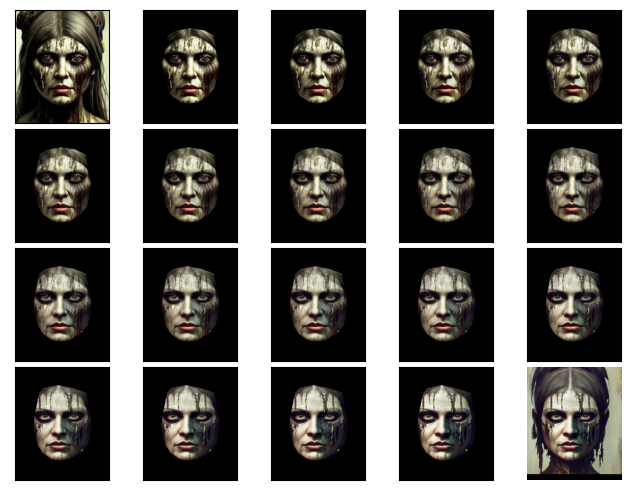

DarkStorm/00005.jpg


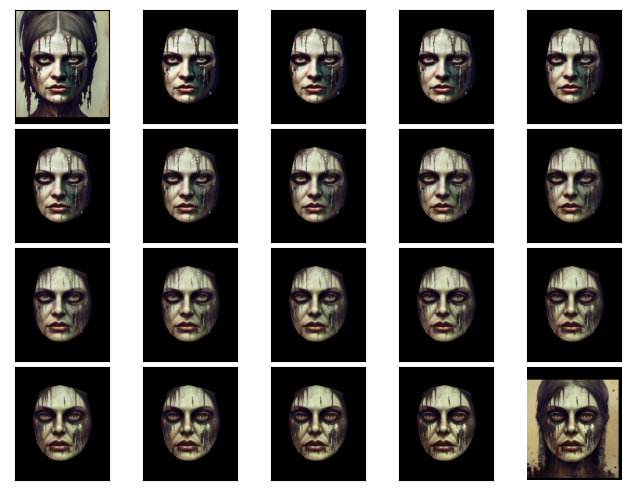

DarkStorm/00006.jpg


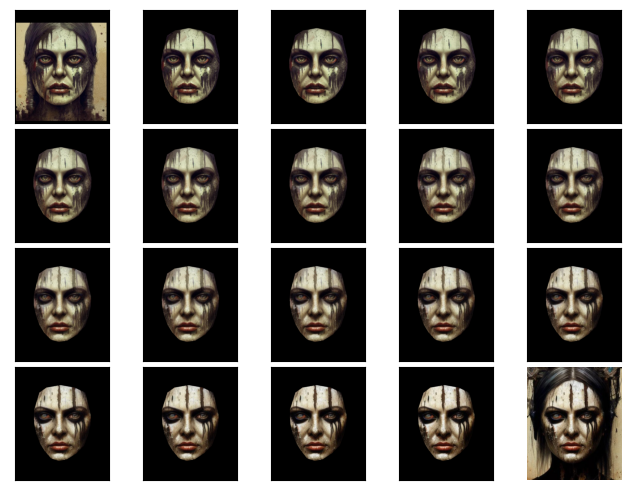

DarkStorm/00007.jpg


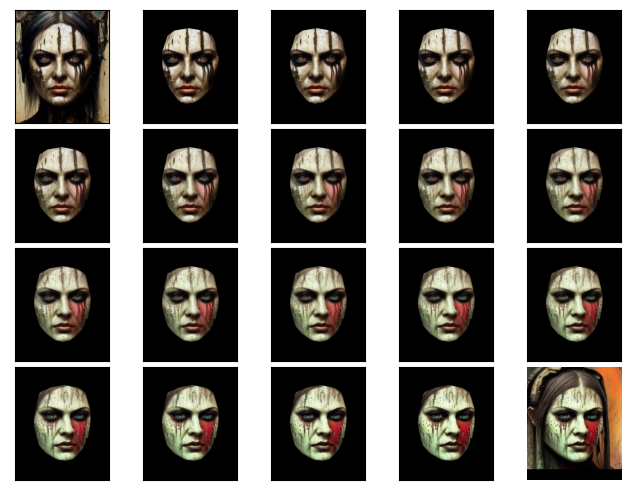

DarkStorm/00008.jpg


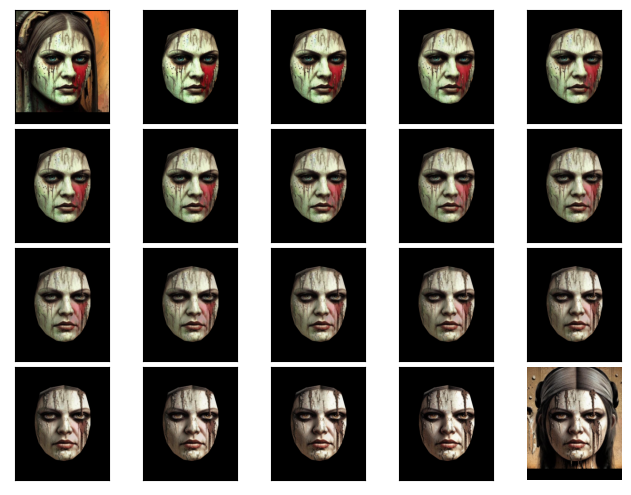

DarkStorm/00009.jpg


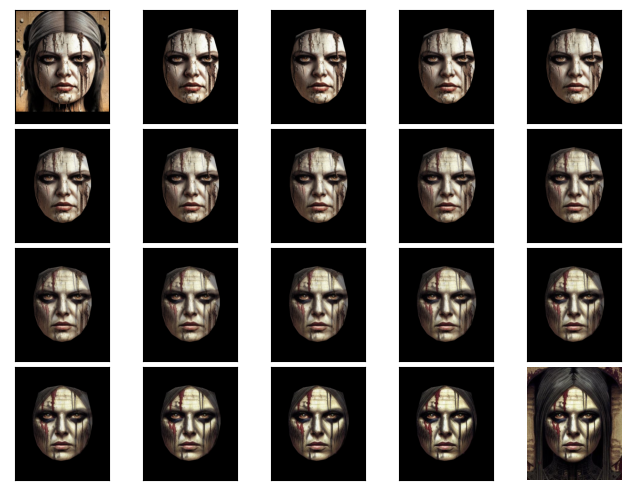

DarkStorm/00010.jpg


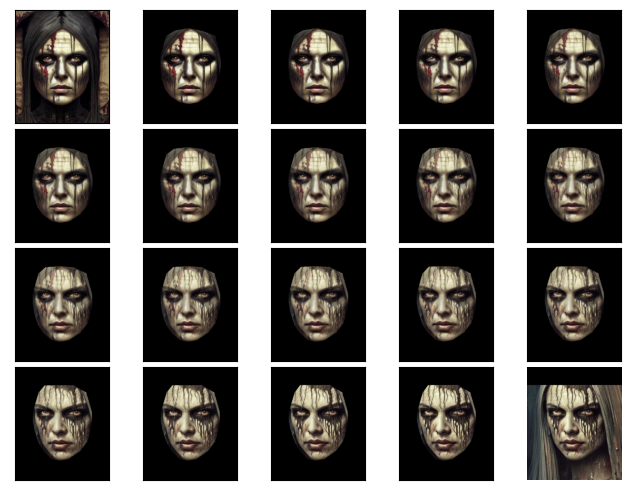

DarkStorm/00011.jpg


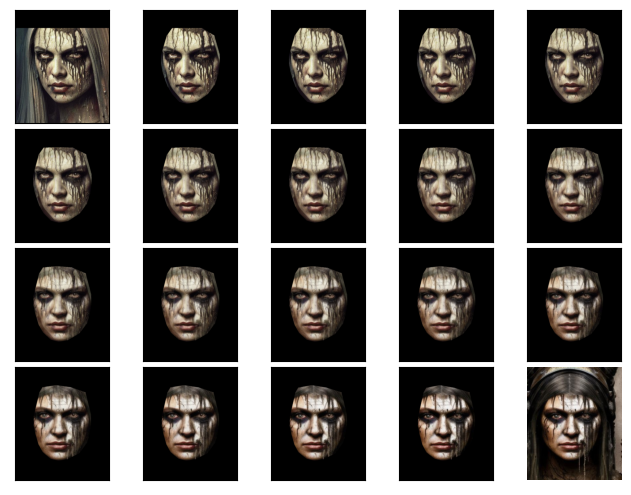

DarkStorm/00012.jpg


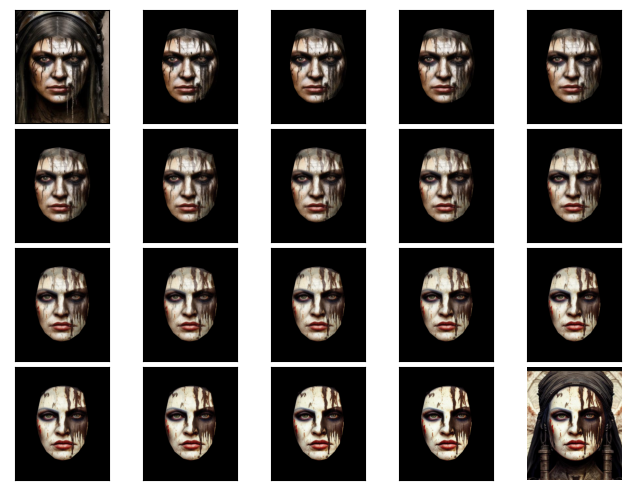

In [84]:
import facemorpher
# Get a list of image paths in a folder
imgpaths = facemorpher.list_imgpaths('DarkStorm/')

# To morph, supply an array of face images:
facemorpher.morpher(imgpaths, plot=True)

No face in /home/jack/Desktop/HDD500/collections/newdownloads/03ef3526d2284594a35a52244fb4b134.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/1080_2023-03-09-11:531678334028.jpg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/1080_2023-03-09-12:511678337495.jpg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/1080_2023-03-09-13:091678338540.jpg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/1080_2023-03-09-13:381678340331.jpg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/1080_2023-03-09-13:391678340360.jpg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/1080_2023-03-09-13:401678340437.jpg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/1080_2023-03-09-14:231678343038.jpg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/1080_2023-03-11-10:311678501879.jpg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/1080_2023-03-11-18:401678531221.jpg
No face in /home/j

No face in /home/jack/Desktop/HDD500/collections/newdownloads/create a brilliant primary colored highly detailed comic book outlined style illustration of beautiful alien woman, 4k01.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/create a brilliant primary colored highly detailed comic book outlined style illustration of beautiful alien woman, 4k04.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/create a brilliant primary colored highly detailed comic book outlined style illustration of beautiful alien woman, 4k076.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/create a brilliant primary colored highly detailed comic book outlined style illustration of beautiful alien woman, 4k09.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/create a brilliant primary colored highly detailed, centered,comic book outlined style illustration of beautiful alien woman, 4k.jpeg
No face in /home/jack/Desktop/HDD500/collections/ne

No face in /home/jack/Desktop/HDD500/collections/newdownloads/create-a-star-gate-in-a-dystopian-post-apocalyptic-city--in-the-future-highly-detailed-art-station-174635306.png
No face in /home/jack/Desktop/HDD500/collections/newdownloads/create-a-star-gate-in-a-dystopian-post-apocalyptic-city--in-the-future-highly-detailed-art-station-403596479.png
No face in /home/jack/Desktop/HDD500/collections/newdownloads/create-a-star-gate-in-a-dystopian-post-apocalyptic-city--in-the-future-highly-detailed-art-station-436248176.png
No face in /home/jack/Desktop/HDD500/collections/newdownloads/create-a-star-gate-in-a-dystopian-post-apocalyptic-city--in-the-future-highly-detailed-art-station-496156164.png
No face in /home/jack/Desktop/HDD500/collections/newdownloads/create-a-star-gate-in-a-dystopian-post-apocalyptic-city--in-the-future-highly-detailed-art-station-563984845.png
No face in /home/jack/Desktop/HDD500/collections/newdownloads/create-a-star-gate-in-a-dystopian-post-apocalyptic-city--in-the

No face in /home/jack/Desktop/HDD500/collections/newdownloads/mdjrny-v4 style brilliant colors create a highly detailed alien landscape with a concept art , marvel comic book style art , artstation 4k04.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/mdjrny-v4 style brilliant colors create a highly detailed alien landscape with a concept art , marvel comic book style art , artstation 4k05.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/mdjrny-v4 style brilliant colors create a highly detailed alien landscape with a concept art , marvel comic book style art , artstation 4k06.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/mdjrny-v4 style brilliant colors create a highly detailed alien landscape with a concept art , marvel comic book style art , artstation 4k26.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/mdjrny-v4 style brilliant colors create a highly detailed alien landscape with a concept art , marvel comi

No face in /home/jack/Desktop/HDD500/collections/newdownloads/stable1-4 style brilliant colors create a highly detailed alien landscape with a concept art , marvel comic book style art , artstation 4k38.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/stable1-4 style brilliant colors create a highly detailed alien landscape with a concept art , marvel comic book style art , artstation 4k39.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/stable1-5mdjrny-v4 style brilliant colors create a highly detailed alien landscape with a concept art , marvel comic book style art , artstation 4k27.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/steampunk-futuristic-world-music-sound-life-in-space-other-worlds-mysterious-architecture-new--129834769.png
No face in /home/jack/Desktop/HDD500/collections/newdownloads/stotmy-weather.jpeg
No face in /home/jack/Desktop/HDD500/collections/newdownloads/stotmy-weather=giant trees.jpeg
No face in /home/jac

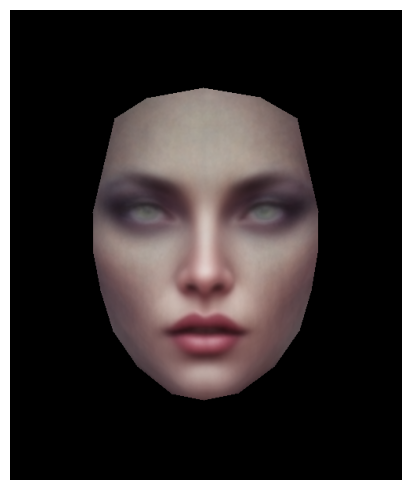

In [89]:
import facemorpher
import glob
# Get a list of image paths in a folder
#imgpaths = facemorpher.list_imgpaths('DarkStorm/')
imgpaths = facemorpher.list_imgpaths('/home/jack/Desktop/HDD500/collections/newdownloads/')
# To morph, supply an array of face images:
#facemorpher.morpher(imgpaths, plot=True)
#images = glob.glob('DarkStorm/*.jpg')
# To average, supply an array of face images:
#facemorpher.averager(['image1.png', 'image2.png'], plot=True)
#facemorpher.averager(images, plot=True)
facemorpher.averager(imgpaths, plot=True)

In [82]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

ImportError: cannot import name 'DPMSolverMultistepScheduler' from 'diffusers' (/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/diffusers/__init__.py)

In [81]:
from diffusers import StableDiffusionPipeline
import torch

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]  
    
image.save("astronaut_rides_horse.png")


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]  
    
image.save("astronaut_rides_horse.png")

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]
    
image.save("astronaut_rides_horse.png")

/home/jack/Downloads/saved_pages/AI Art Generator dreamlike.art.html
/home/jack/Downloads/saved_pages/DreamLikeSamKuvshinov Stable Diffusion Checkpoint Civitai.html
/home/jack/Downloads/saved_pages/Jack Northrup - Playground AI.html
/home/jack/Downloads/saved_pages/History - Lexica.html
/home/jack/Downloads/saved_pages/G-SSA-7162-OCR-SM-1.pdf
/home/jack/Downloads/saved_pages/Civitai.html
/home/jack/Downloads/saved_pages/King Lui - Playground AI.html
/home/jack/Downloads/saved_pages/Playground AI (2).html
/home/jack/Downloads/saved_pages/Jack Northrup - Playground AI_files/714-3850a77af8d42ed3.js
/home/jack/Downloads/saved_pages/Jack Northrup - Playground AI_files/44c24796-d877a32b0577fd60.js
/home/jack/Downloads/saved_pages/Jack Northrup - Playground AI_files/959-078a8a37da6b3da8.js
/home/jack/Downloads/saved_pages/Jack Northrup - Playground AI_files/513-8f2f17a5a3c6a774.js
/home/jack/Downloads/saved_pages/Jack Northrup - Playground AI_files/main-e7a7892cb0edc024.js
/home/jack/Download

/home/jack/Downloads/saved_pages/King Lui - Playground AI_files/logo.svg
/home/jack/Downloads/saved_pages/King Lui - Playground AI_files/logo-light.svg
/home/jack/Downloads/saved_pages/King Lui - Playground AI_files/v3
/home/jack/Downloads/saved_pages/King Lui - Playground AI_files/m-outer-93afeeb17bc37e711759584dbfc50d47_data/m-outer-8cb24ab2d649fd36a488d04d8c457933.js
/home/jack/Downloads/saved_pages/King Lui - Playground AI_files/m-outer-93afeeb17bc37e711759584dbfc50d47_data/inner.html
/home/jack/Downloads/saved_pages/King Lui - Playground AI_files/m-outer-93afeeb17bc37e711759584dbfc50d47_data/inner_data/out-4.5.42.js
/home/jack/Downloads/saved_pages/Playground AI (2)_files/44c24796-d877a32b0577fd60.js
/home/jack/Downloads/saved_pages/Playground AI (2)_files/513-8f2f17a5a3c6a774.js
/home/jack/Downloads/saved_pages/Playground AI (2)_files/main-e7a7892cb0edc024.js
/home/jack/Downloads/saved_pages/Playground AI (2)_files/logo.svg
/home/jack/Downloads/saved_pages/Playground AI (2)_files